# Student Performance Indicator

### Machine Learning Project
    
- Understanding the Problem Statement
- Data Collection
- Data Check to perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem Statement

- This project understands how the student performance (test score) is affected by other variables

### 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.


### 2.1 Import Data and Required Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Import the CSV Data as Pandas DataFrame

In [14]:
df = pd.read_csv("data/stud.csv")

### Show Top 5 records

In [16]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [17]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [19]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [27]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates  values in the data set

#### 3.3 Check Data Types

In [28]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

### 3.4 Checking the number of unique values of each column

In [36]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [37]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [38]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [56]:
print("Unique values in categorical columns and their counts\n")
for i in df.columns:
    if df[i].dtype == "object":
        print(f"Categories in '{i}' variable: {df[i].unique()}")
        print(f"Total number of categories {len(df[i].unique())}")
        print("-"*150)

Unique values in categorical columns and their counts

Categories in 'gender' variable: ['female' 'male']
Total number of categories 2
------------------------------------------------------------------------------------------------------------------------------------------------------
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Total number of categories 5
------------------------------------------------------------------------------------------------------------------------------------------------------
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Total number of categories 6
------------------------------------------------------------------------------------------------------------------------------------------------------
Categories in 'lunch' variable: ['standard' 'free/reduced']
Total number of categories 2
--------

In [51]:
# Define numerical and categorical columns
numerical_features = [i for i in df.columns if df[i].dtype!='O']
categorical_features = [i for i in df.columns if df[i].dtype=='O']

print("Total number of numerical features are {}: {}\n".format(len(numerical_features),numerical_features))
print("Total number of categorical features are {}: {}".format(len(categorical_features),categorical_features))

Total number of numerical features are 3: ['math_score', 'reading_score', 'writing_score']

Total number of categorical features are 5: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for "Total Score" and "Average"

In [57]:
df["total_score"] = df.writing_score + df.reading_score + df.math_score
df["average"] = df.total_score/3

In [58]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [86]:
for i in numerical_features:
    print(f"Number of students with full marks in {i.replace("_score","").capitalize()}: {len(df[df[i]==100]["average"])}")

Number of students with full marks in Math: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [87]:
for i in numerical_features:
    print(f"Number of students with less than 20 marks in {i.replace("_score","").capitalize()}: {len(df[df[i]<20]["average"])}")

Number of students with less than 20 marks in Math: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

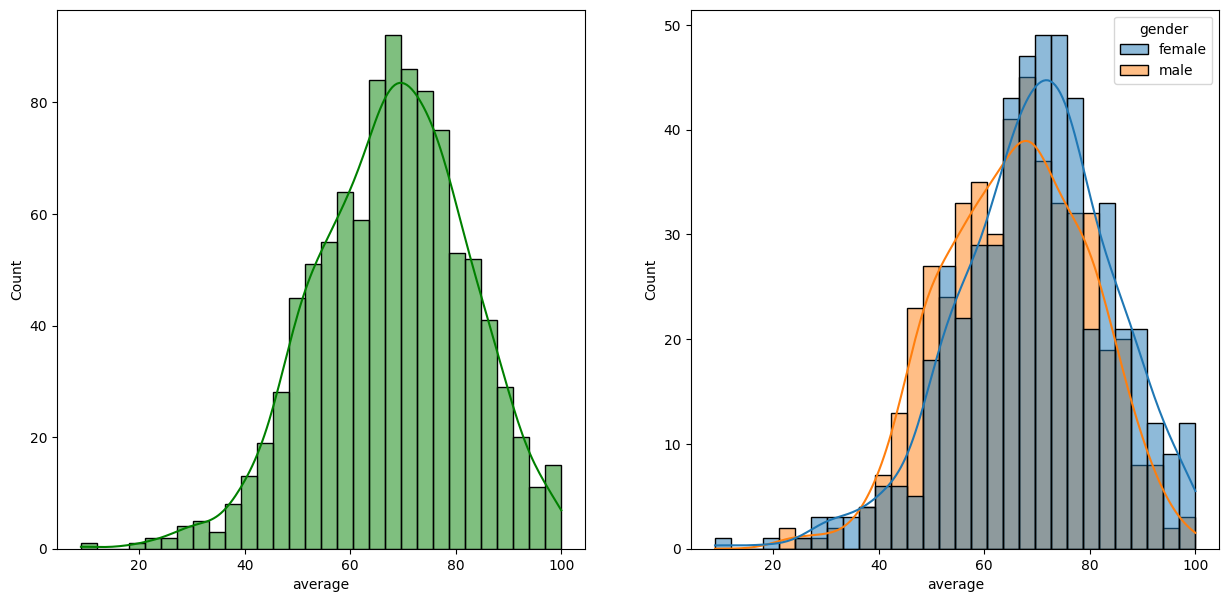

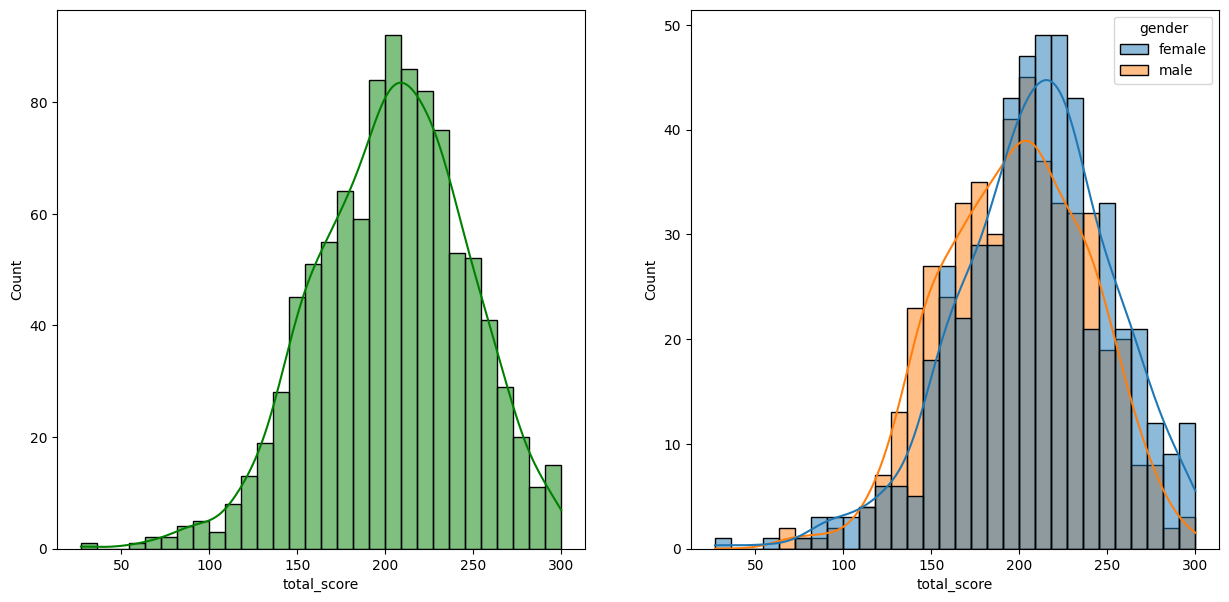

In [140]:
features = ["average","total_score"]
for feature in features:
    plt.subplots(1,2,figsize=(15,7))
    plt.subplot(121)
    sns.histplot(data=df,x=feature,bins=30,kde=True,color='g')
    plt.subplot(122)
    sns.histplot(data=df,x=feature,bins=30,kde=True,hue="gender")
    plt.show()

#####  Insights
- Female students tend to perform well then male students.

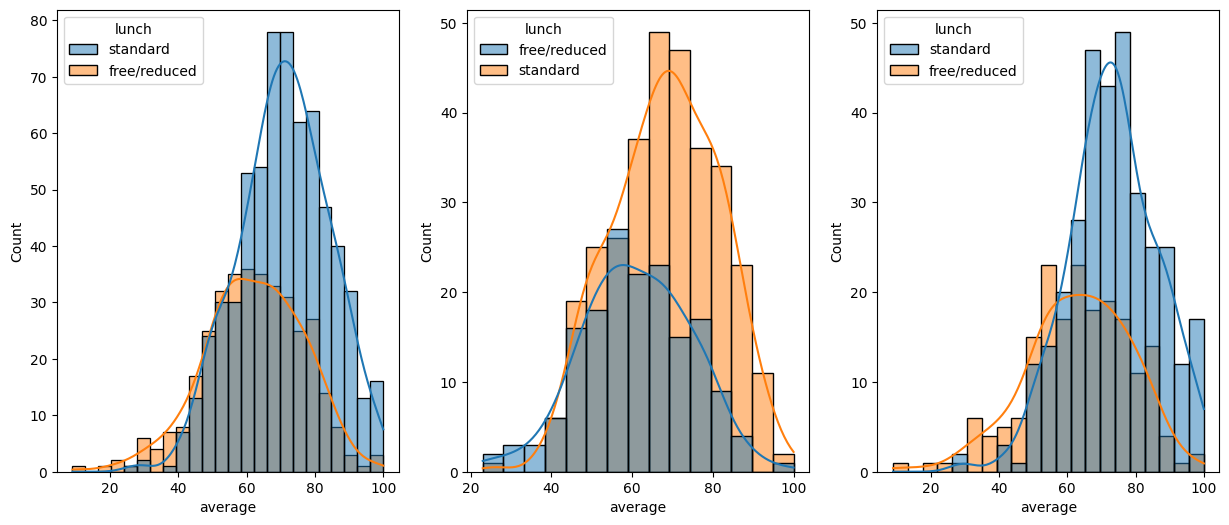

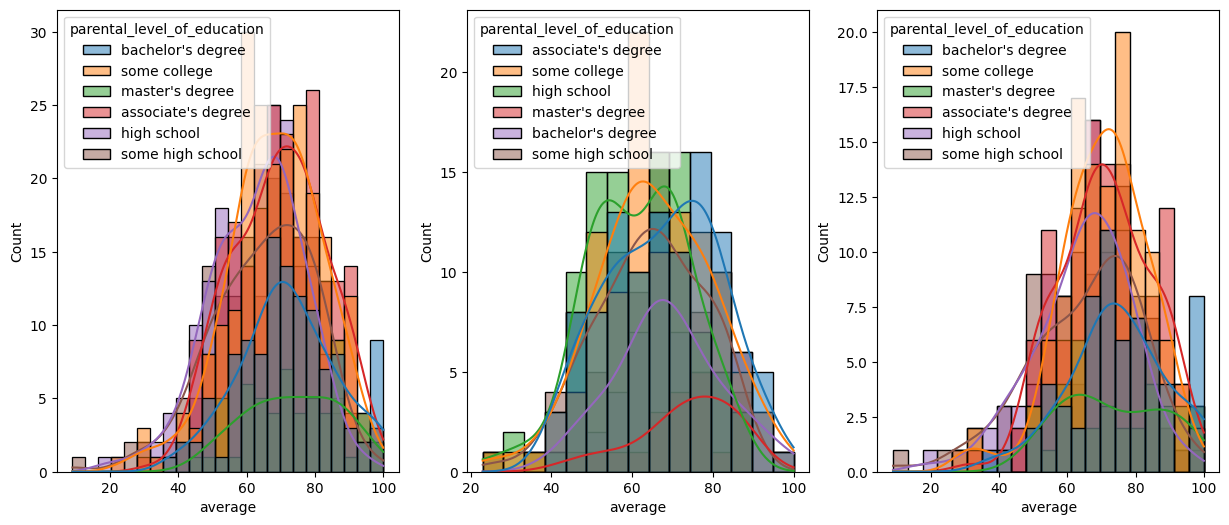

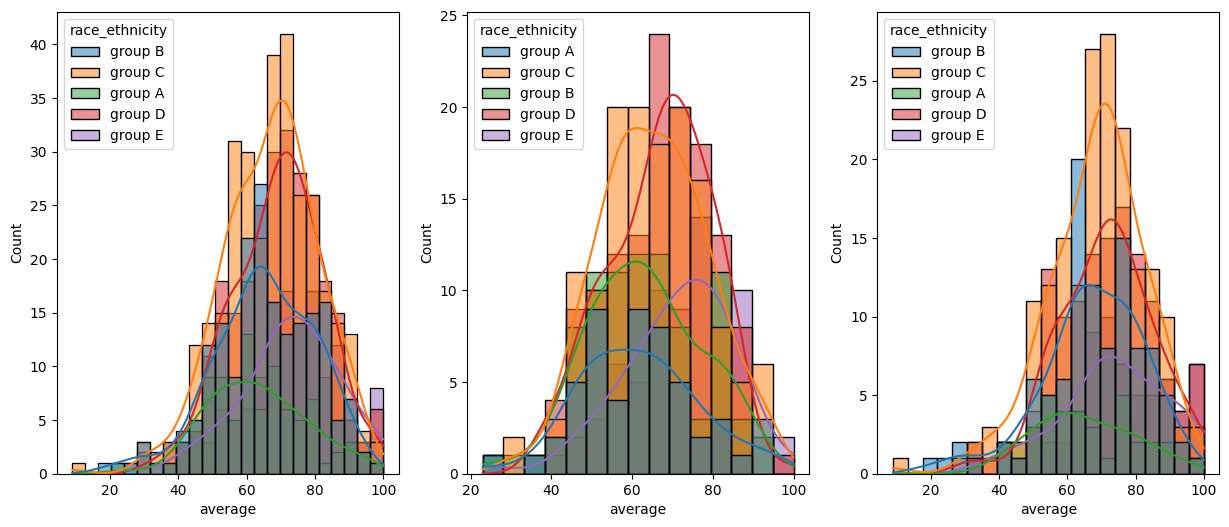

In [149]:
features = ["lunch","parental_level_of_education","race_ethnicity"]
for feature in features:
    plt.subplots(1,3,figsize=(15,6))
    plt.subplot(1,3,1)
    sns.histplot(data=df,x="average",kde=True,hue = feature)
    plt.subplot(1,3,2)
    sns.histplot(data=df[df.gender=="male"],x="average",kde=True,hue=feature)
    plt.subplot(1,3,3)
    sns.histplot(data=df[df.gender=="female"],x="average",kde=True,hue=feature)
    plt.show()

#####  Insights 
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.


- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.1.2 Multivariate analysis using pieplot

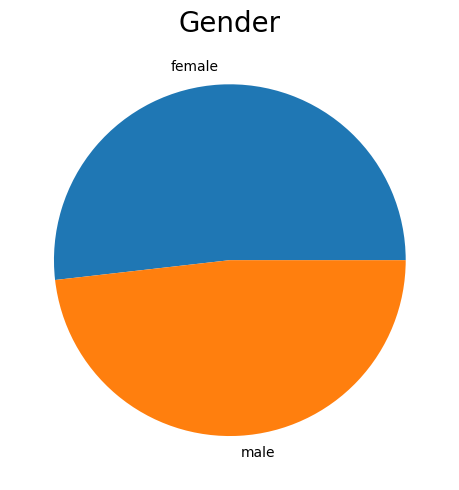

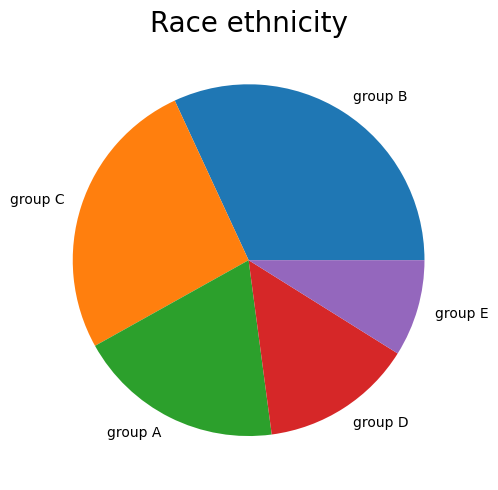

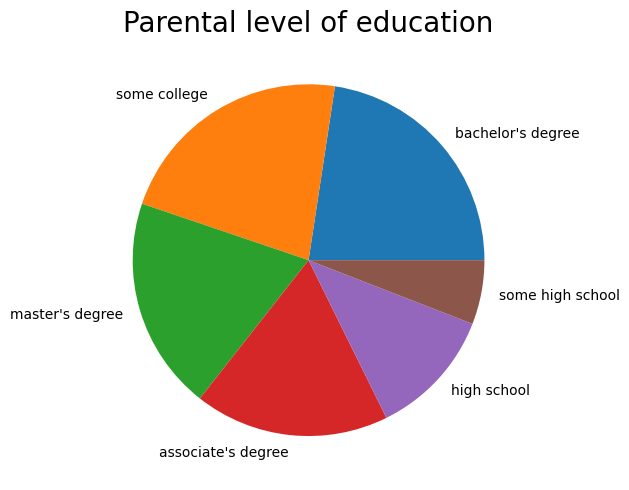

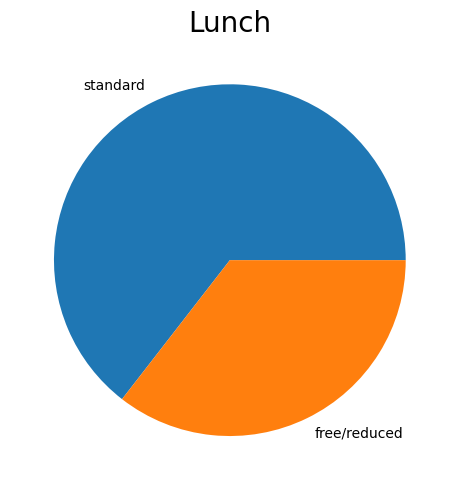

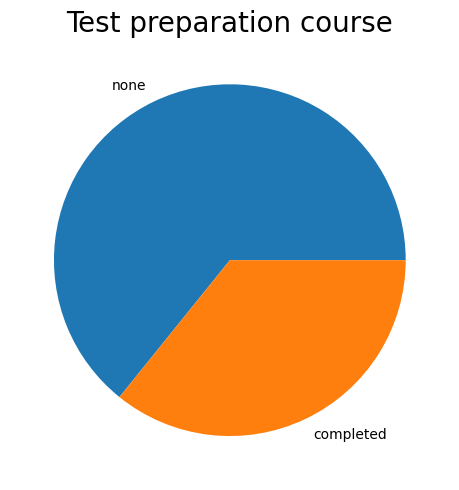

In [209]:
for feature in categorical_features:
    plt.figure(figsize=(10,5))
    plt.pie(x=df[feature].value_counts(),labels=df[feature].unique())
    plt.title(feature.replace("_"," ").capitalize(),fontsize = 20)
    plt.tight_layout()
    plt.grid()
    plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.2 Feature Wise Visualization

#### 4.2.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

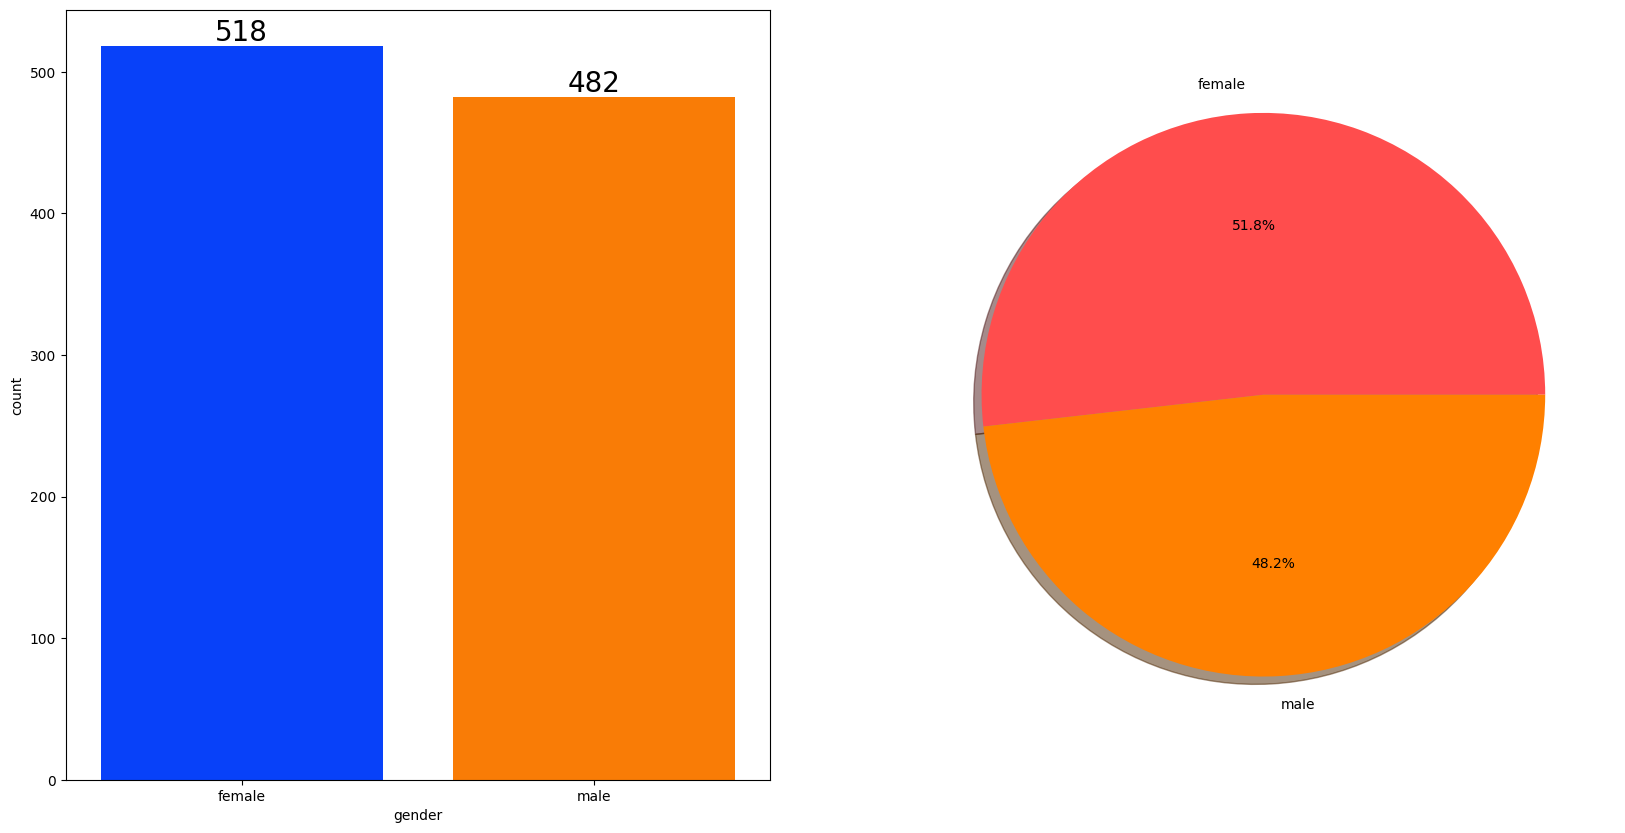

In [216]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=df["gender"].unique(),autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (52%) and male students are 482 (48%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

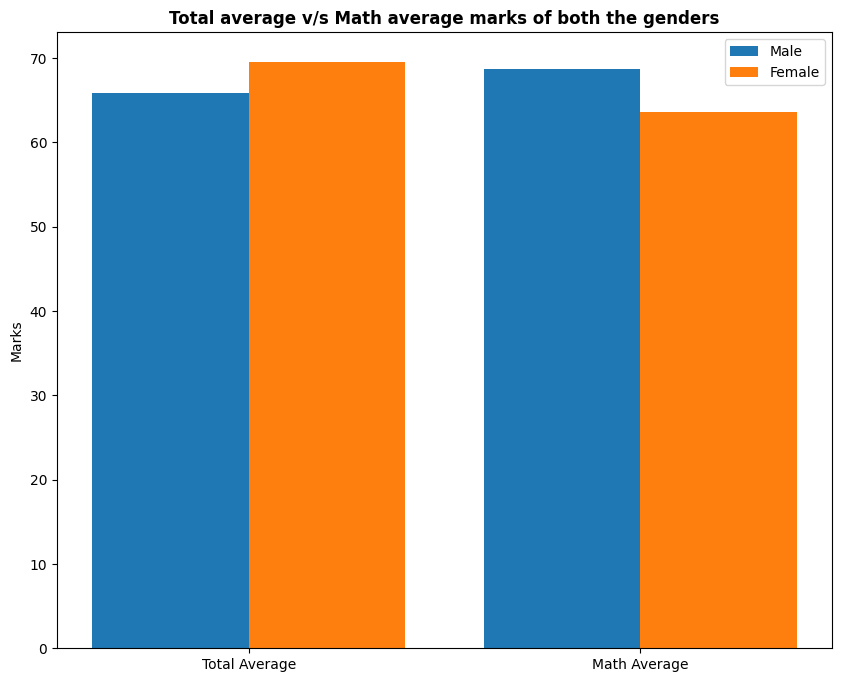

In [261]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [df.groupby('gender')['average'].mean()[0], df.groupby('gender')['math_score'].mean()[0]]
male_scores = [df.groupby('gender')['average'].mean()[1], df.groupby('gender')['math_score'].mean()[1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.2.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

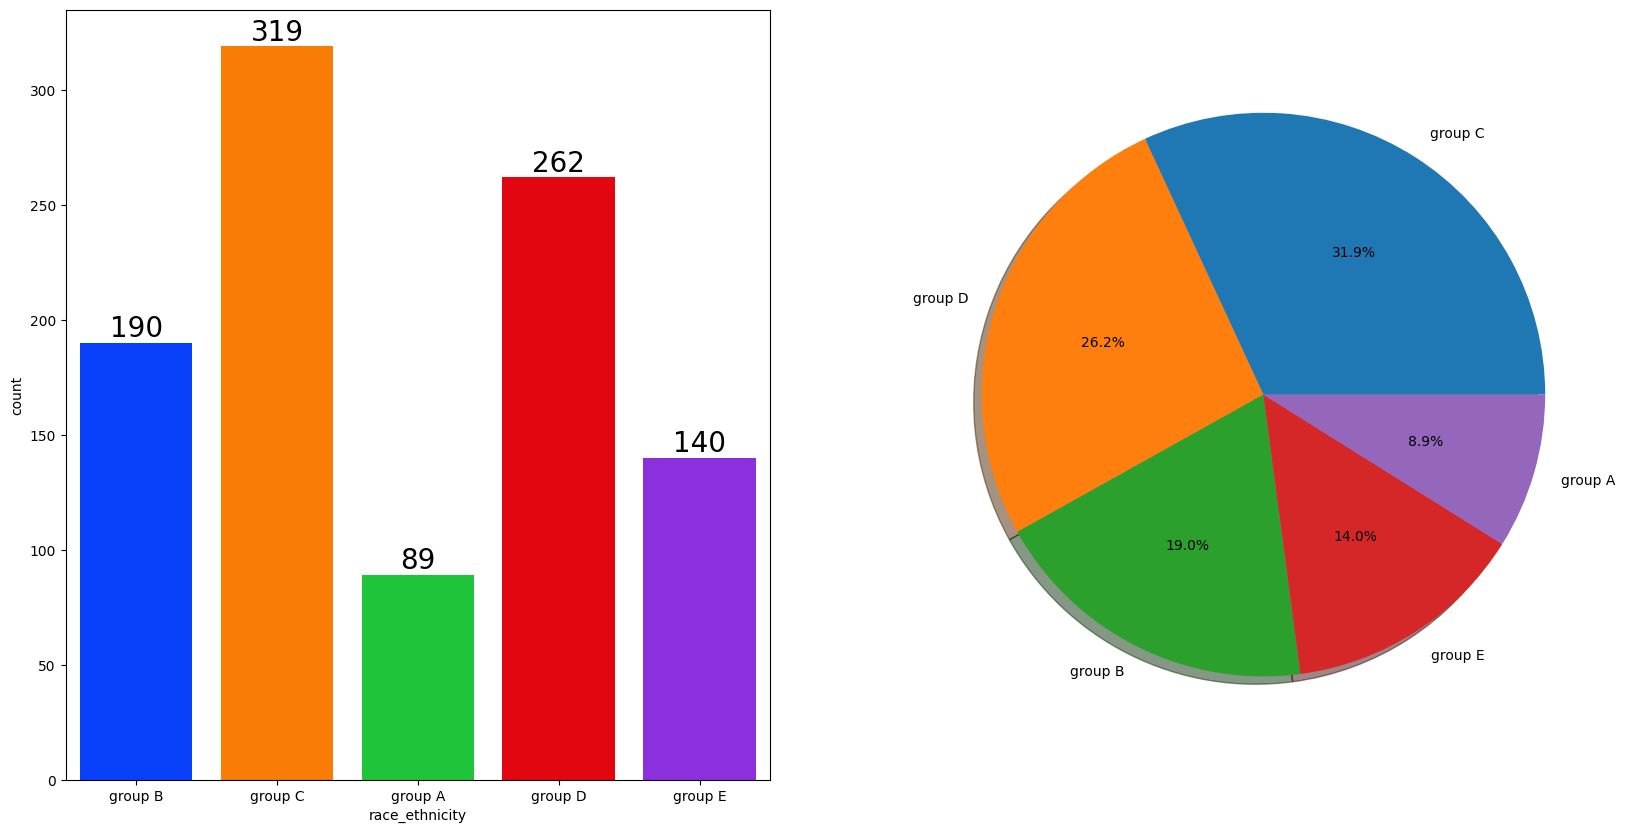

In [263]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,autopct='%1.1f%%',shadow=True)
plt.show()  

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

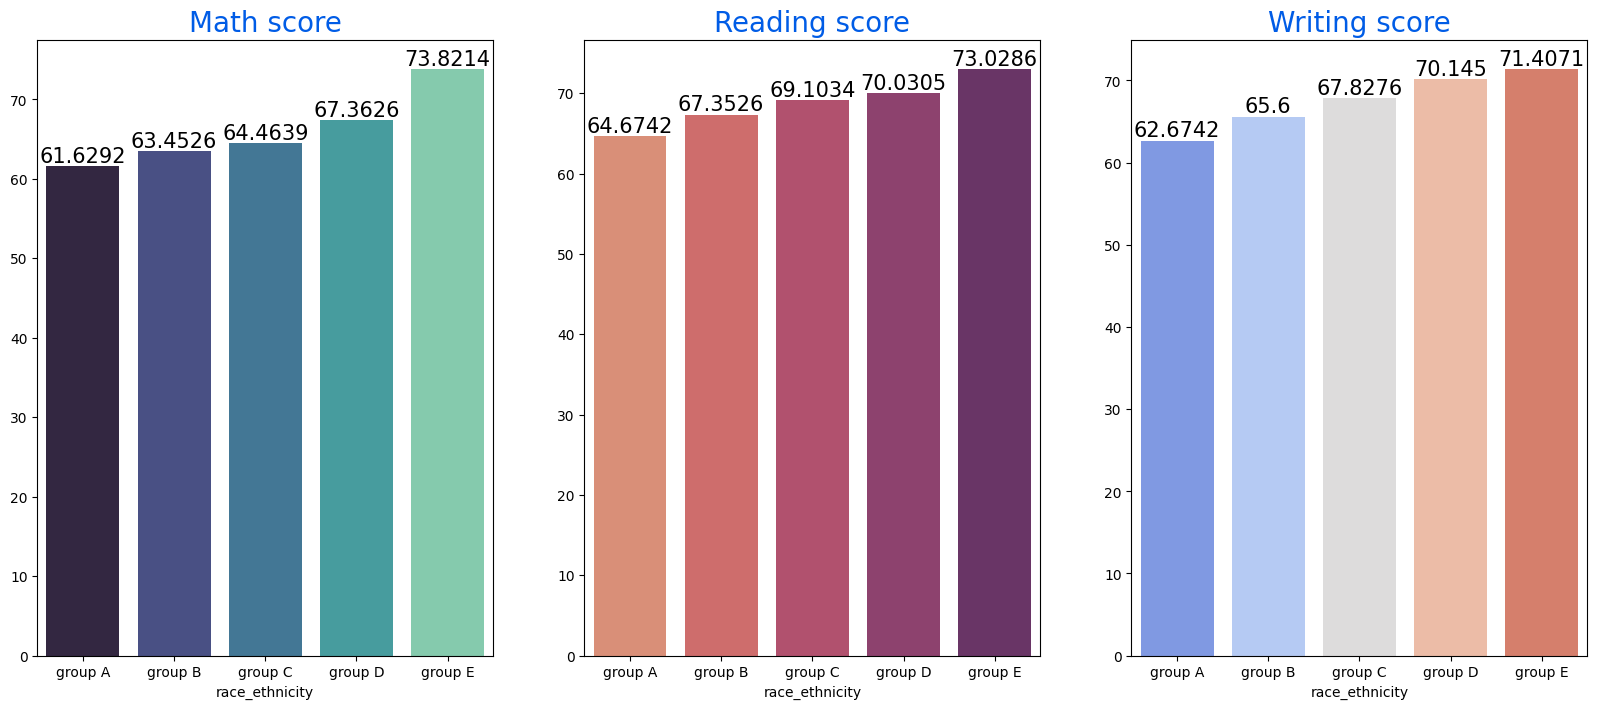

In [264]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.2.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

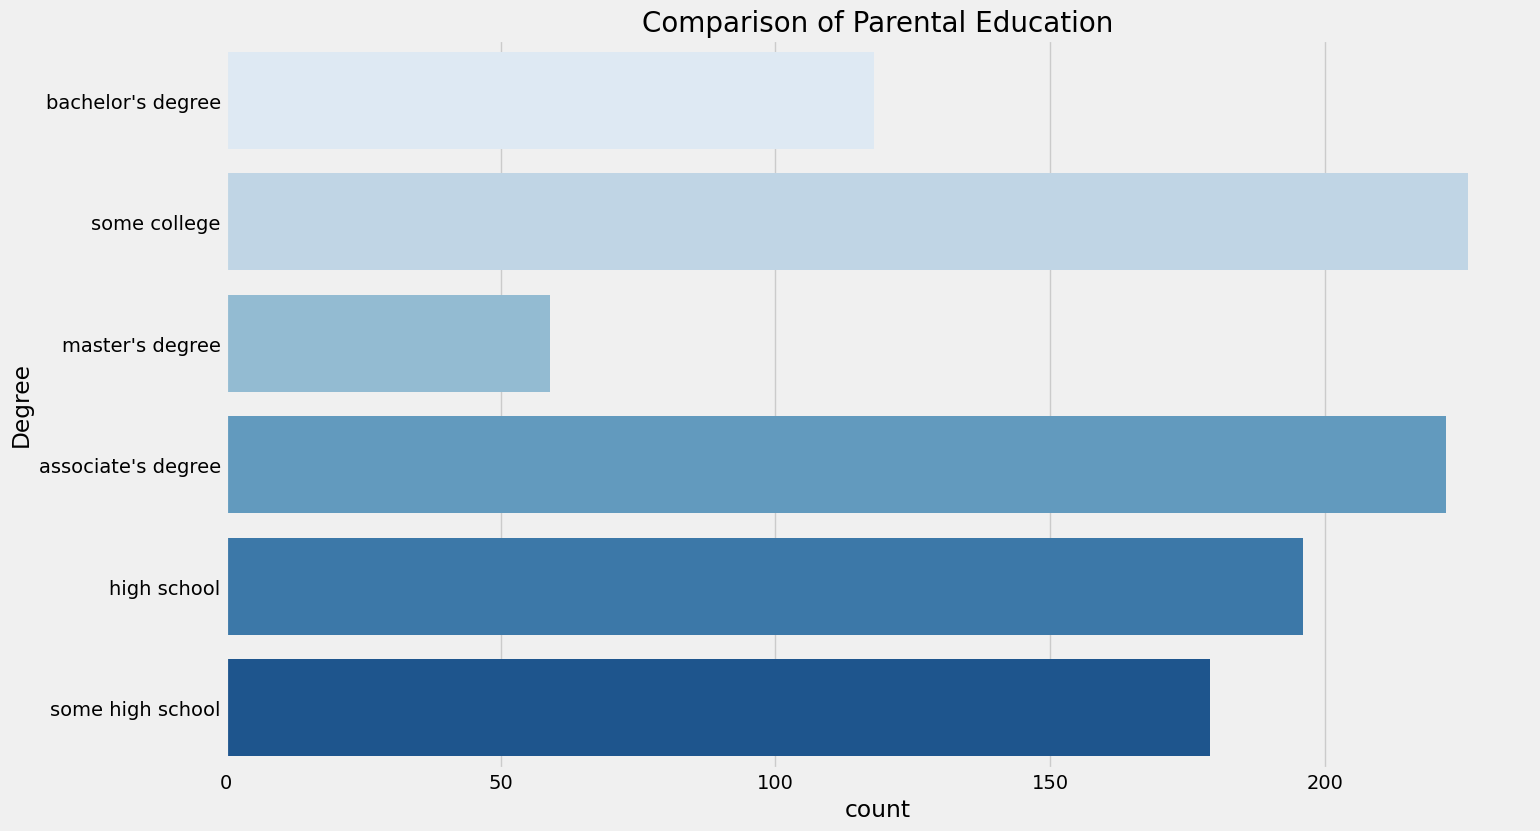

In [279]:
plt.figure(figsize=(15, 9))
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('count')
plt.ylabel('Degree')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

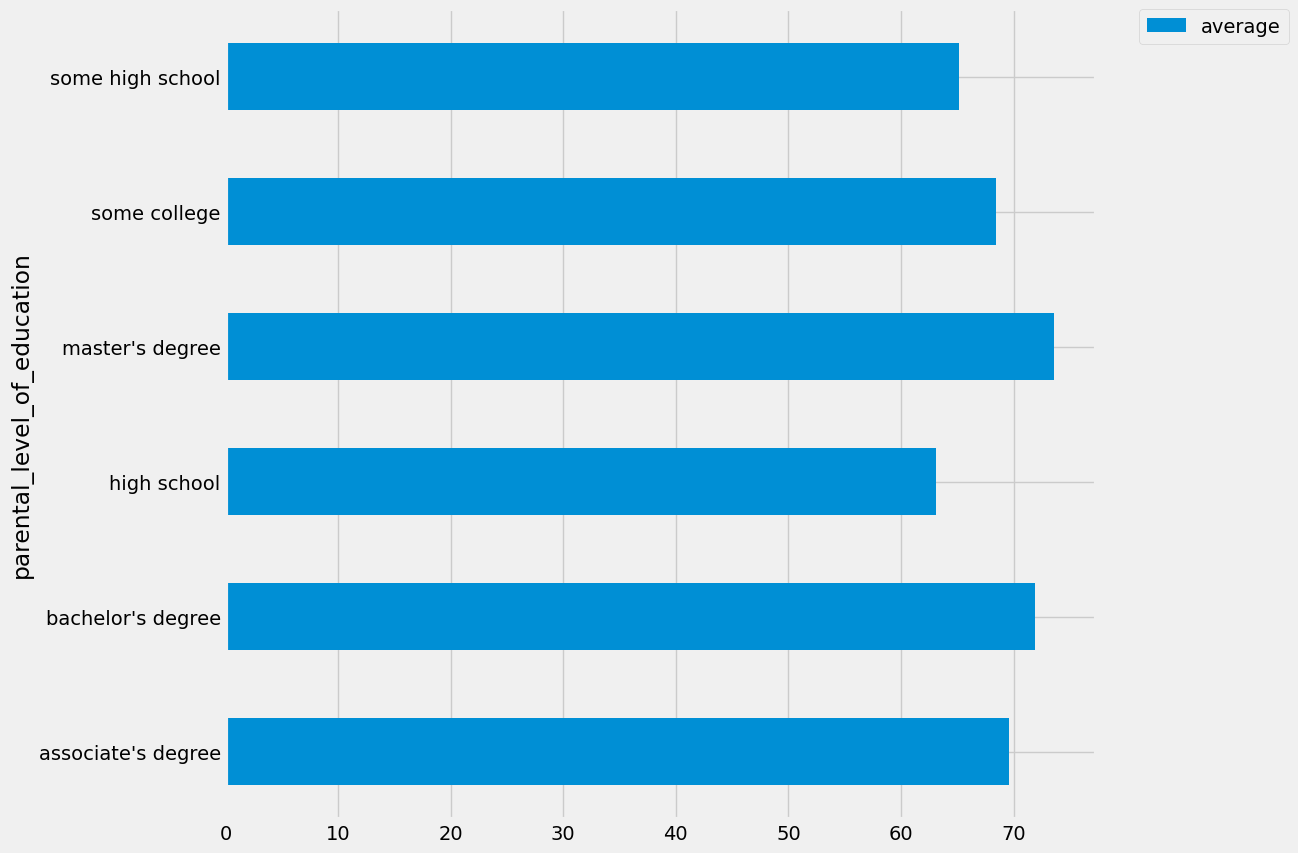

In [269]:
df.groupby('parental_level_of_education')["average"].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.2.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

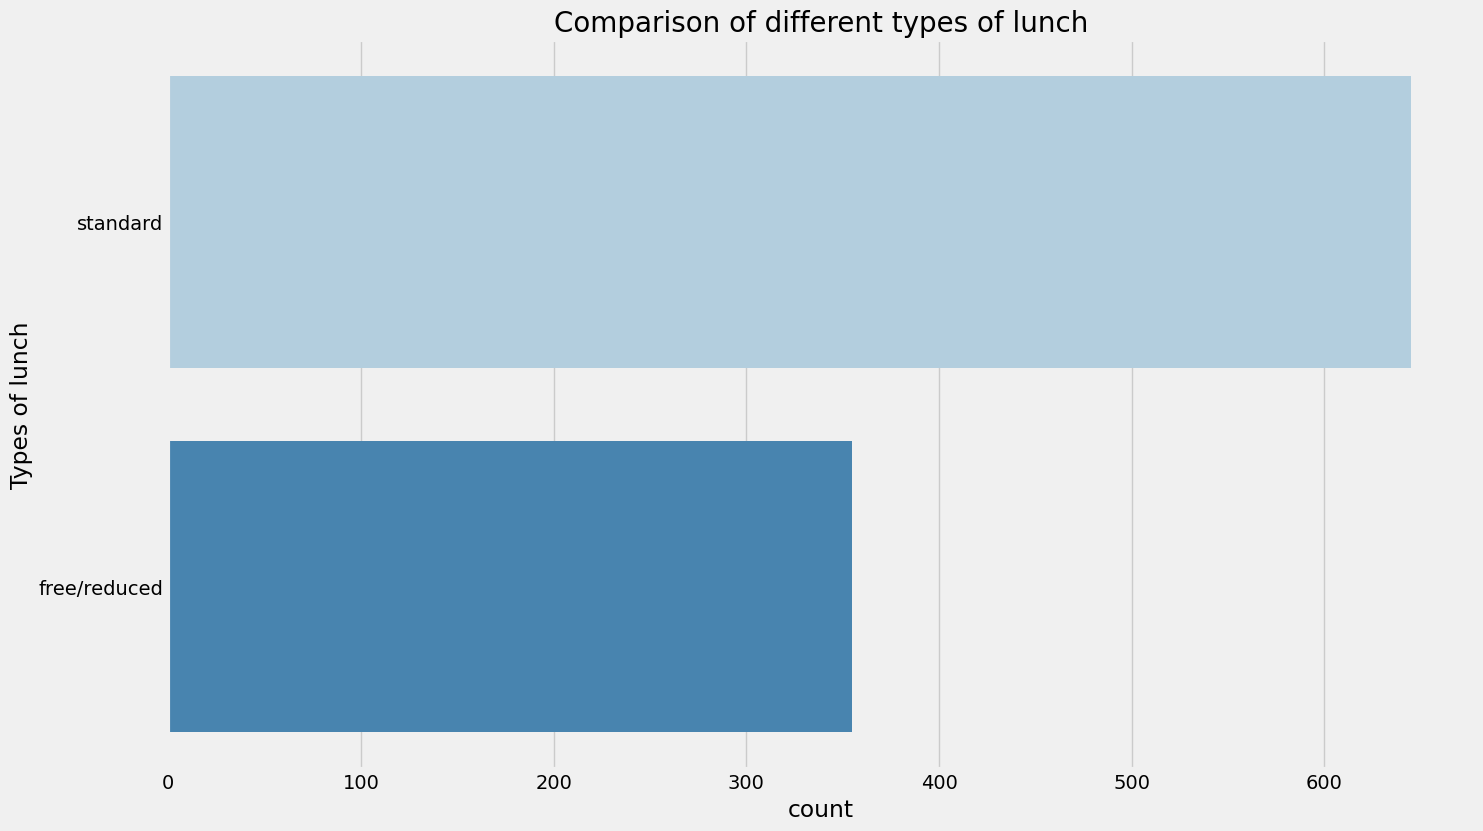

In [281]:
plt.figure(figsize=(15, 9))
sns.countplot(df['lunch'], palette = 'Blues')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('count')
plt.ylabel('Types of lunch')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

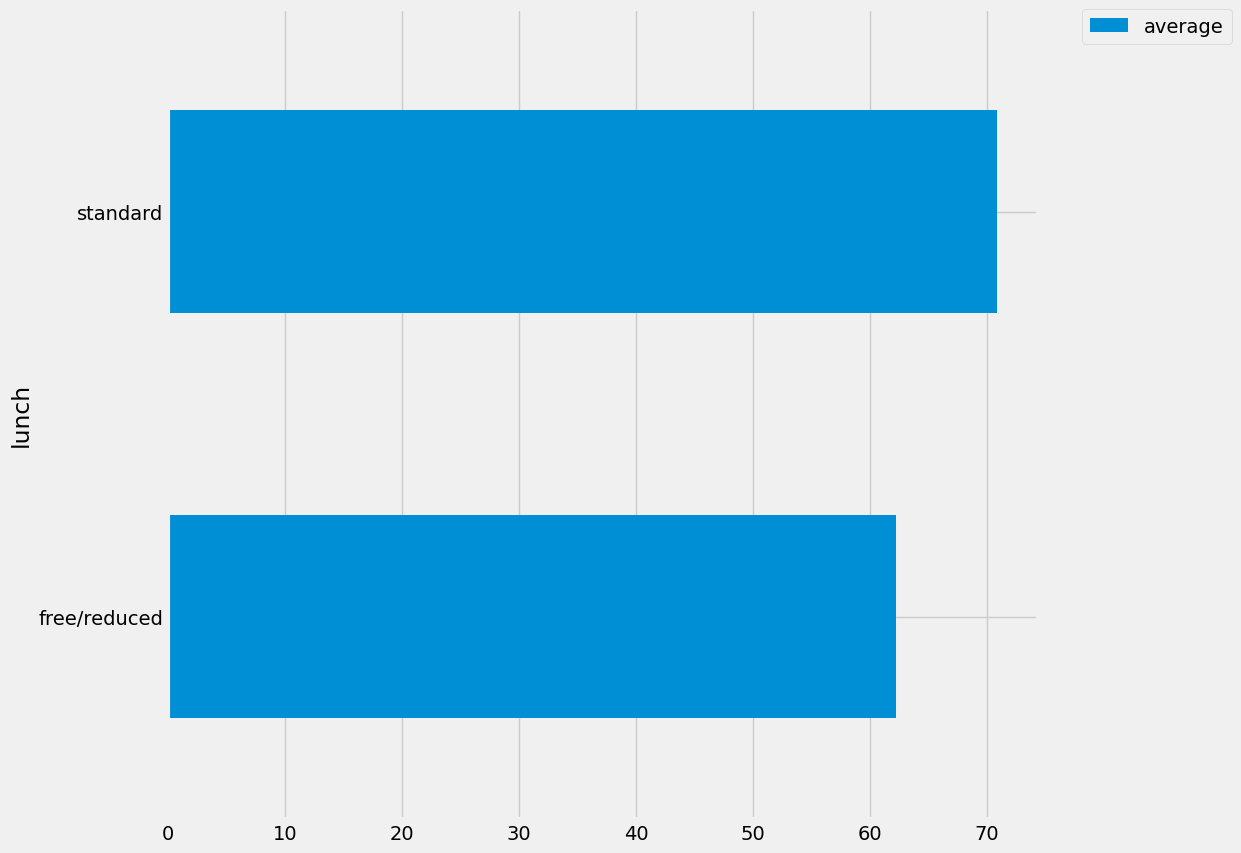

In [276]:
df.groupby('lunch')["average"].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.2.5 TEST PREPARATION COURSE COLUMN 
- How many student completed test preparation course ?
- Is Test preparation course has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( Comparision of student completed test preparation course  ? )

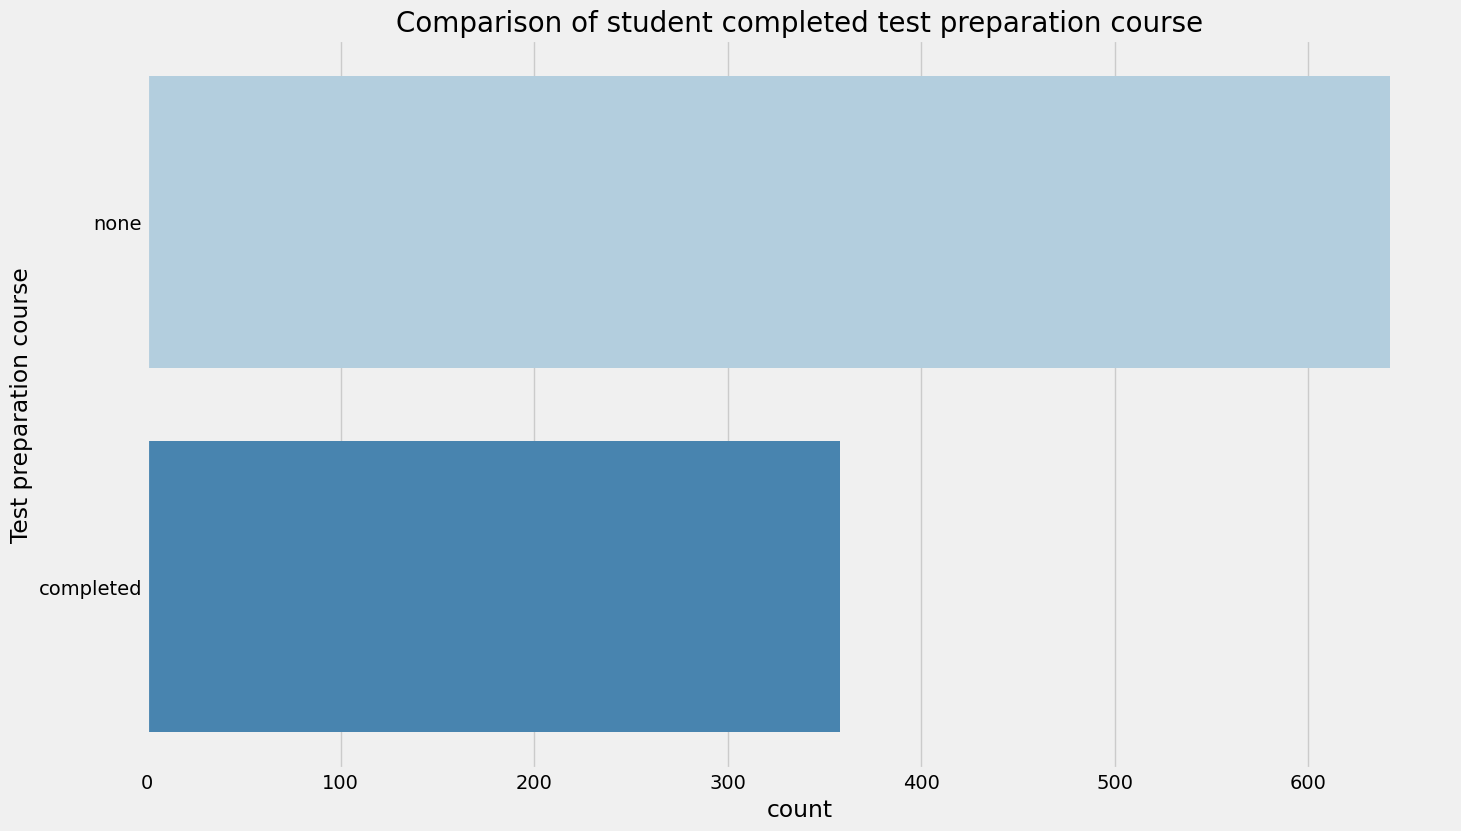

In [282]:
plt.figure(figsize=(15, 9))
sns.countplot(df['test_preparation_course'], palette = 'Blues')
plt.title('Comparison of student completed test preparation course', fontweight = 30, fontsize = 20)
plt.xlabel('count')
plt.ylabel('Test preparation course')
plt.show()

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

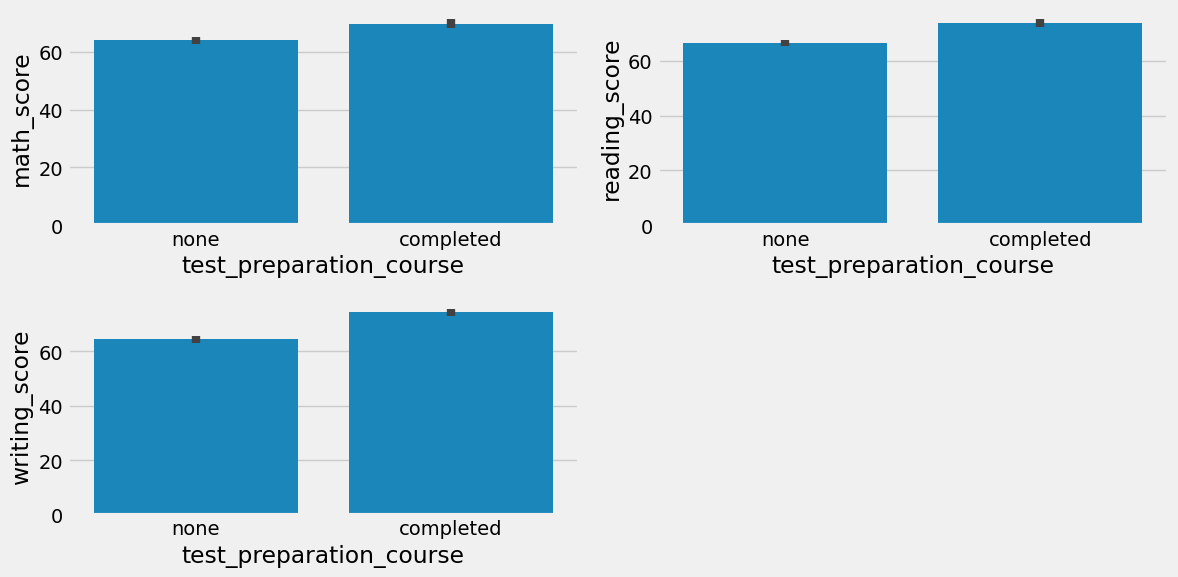

In [293]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['test_preparation_course'], y=df['math_score'])
plt.subplot(2,2,2)
sns.barplot (x=df['test_preparation_course'], y=df['reading_score'])
plt.subplot(2,2,3)
sns.barplot (x=df['test_preparation_course'], y=df['writing_score'])
plt.tight_layout()

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.2.6 CHECKING OUTLIERS

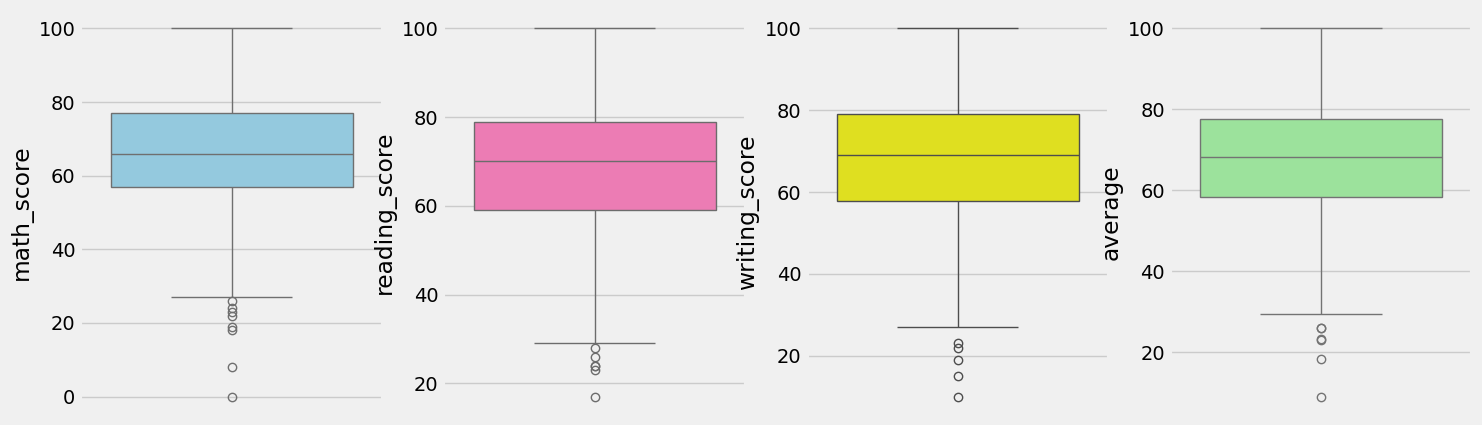

In [297]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(1,4,1)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(1,4,2)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(1,4,3)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(1,4,4)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.2.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

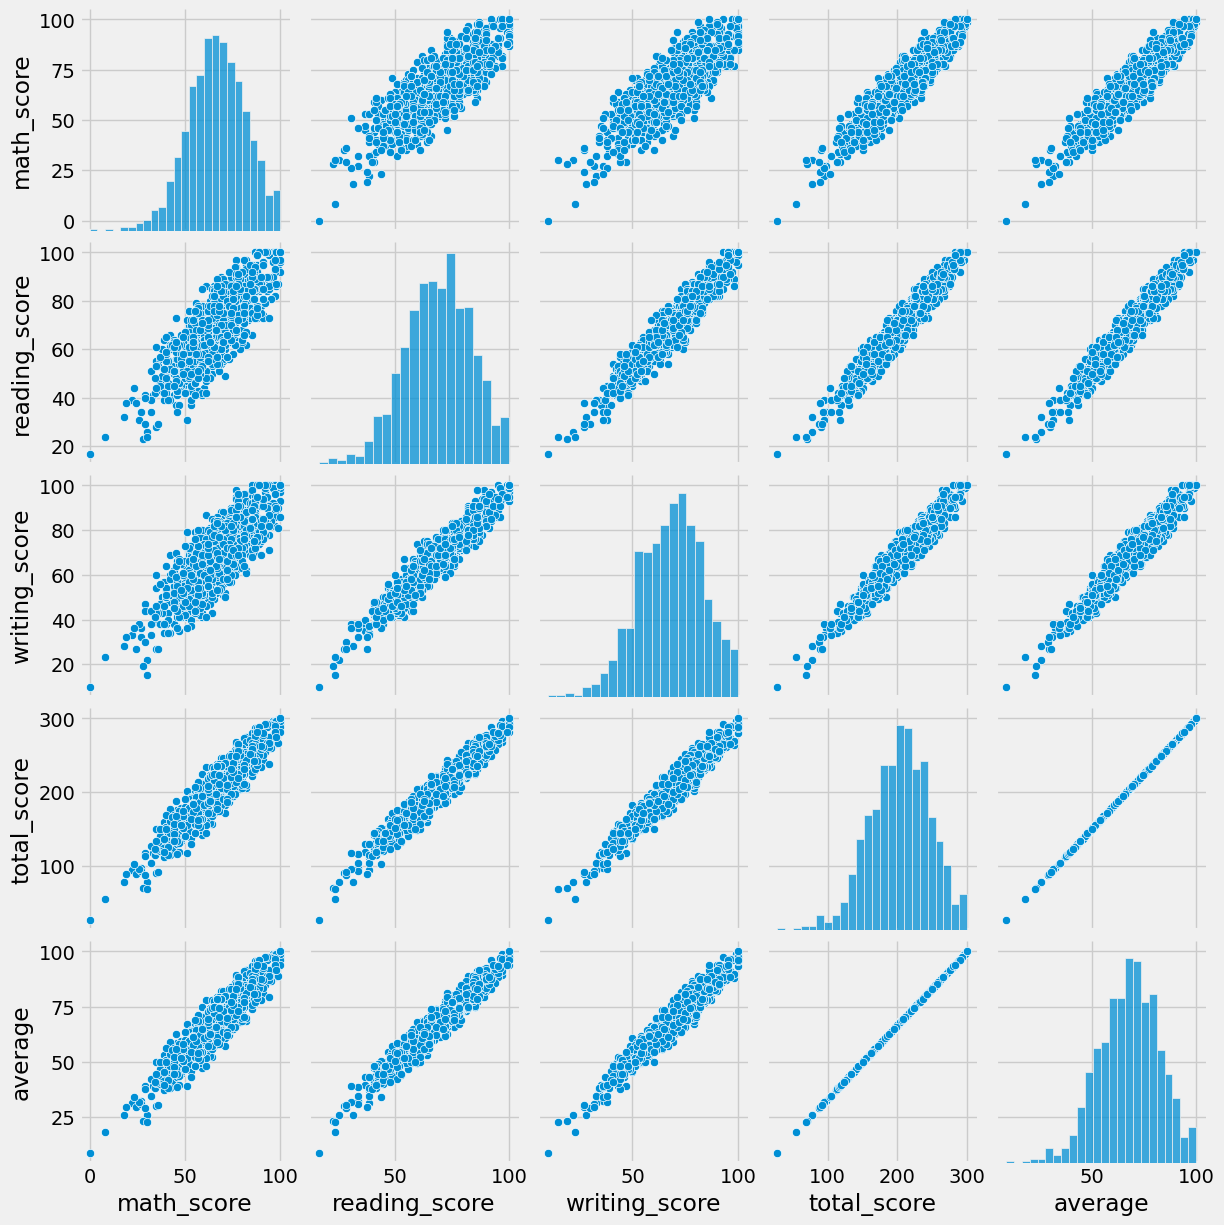

In [300]:
sns.pairplot(df)

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.